In [1]:
import numpy as np
import pandas as pd
from datasets import load_dataset

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

dataset = load_dataset("dair-ai/emotion", trust_remote_code=True)

train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]


print("Train Shape: ", np.shape(train_data))
print("Validation Shape: ", np.shape(validation_data))
print("Test Shape: ", np.shape(test_data))

print("Example: ", train_data[0])

emotion_labels = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}

training_freq = pd.crosstab(index=train_data["label"],  # Make a crosstab
                              columns="count")      # Name the count column

print("Training Data Frequency of Emotions: ")
print(training_freq)

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Train Shape:  (16000, 2)
Validation Shape:  (2000, 2)
Test Shape:  (2000, 2)
Example:  {'text': 'i didnt feel humiliated', 'label': 0}
Training Data Frequency of Emotions: 
col_0  count
row_0       
0       4666
1       5362
2       1304
3       2159
4       1937
5        572


In [2]:
x_train = train_data['text']
y_train = train_data['label']
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

print("Training Features Shape: ", np.shape(x_train_tfidf))

x_test = test_data['text']

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

Training Features Shape:  (16000, 15186)


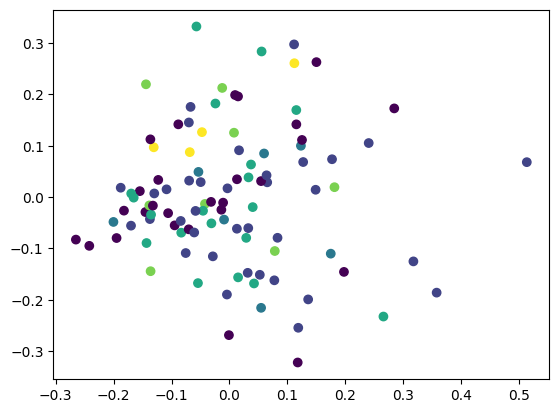

In [3]:
import matplotlib.pyplot as plt




X = np.asarray(x_train_tfidf[:100].todense())
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c = train_data["label"][:100])
plt.show() 

In [4]:
lsvc = SVC(kernel='linear')#LinearSVC(random_state=0,tol=1e-5)
lsvc.fit(x_train_tfidf, y_train)

y_pred = lsvc.predict(x_test_tfidf)

print("LINEAR:")
print(confusion_matrix(test_data['label'],y_pred))
print("\n")
print(classification_report(test_data['label'],y_pred))

print("Training set score for LINEAR SVM: %f" % lsvc.score(x_train_tfidf , y_train))
print("Testing  set score for LINEAR SVM: %f" % lsvc.score(x_test_tfidf, test_data['label'] ))


LINEAR:
[[537  14   3  15   9   3]
 [  6 659  17   4   5   4]
 [  2  48 107   1   0   1]
 [ 15  12   2 241   4   1]
 [ 15   5   1  10 190   3]
 [  2  11   0   1  15  37]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       581
           1       0.88      0.95      0.91       695
           2       0.82      0.67      0.74       159
           3       0.89      0.88      0.88       275
           4       0.85      0.85      0.85       224
           5       0.76      0.56      0.64        66

    accuracy                           0.89      2000
   macro avg       0.85      0.81      0.83      2000
weighted avg       0.88      0.89      0.88      2000

Training set score for LINEAR SVM: 0.956313
Testing  set score for LINEAR SVM: 0.885500


In [5]:
svclassifier_poly = SVC(kernel='poly')
svclassifier_poly.fit(x_train_tfidf, y_train)

y_pred_poly = svclassifier_poly.predict(x_test_tfidf)

print("POLY DEGREE 3:")
print(confusion_matrix(test_data['label'],y_pred_poly))
print("\n")
print(classification_report(test_data['label'],y_pred_poly))


print("Training set score for POLY SVM: %f" % svclassifier_poly.score(x_train_tfidf , y_train))
print("Testing  set score for POLY SVM: %f" % svclassifier_poly.score(x_test_tfidf, test_data['label'] ))


POLY DEGREE 3:
[[403 175   0   1   2   0]
 [ 10 679   5   0   0   1]
 [  7 142   9   1   0   0]
 [ 49 183   0  43   0   0]
 [ 33 149   0   2  40   0]
 [ 11  47   0   0   5   3]]


              precision    recall  f1-score   support

           0       0.79      0.69      0.74       581
           1       0.49      0.98      0.66       695
           2       0.64      0.06      0.10       159
           3       0.91      0.16      0.27       275
           4       0.85      0.18      0.30       224
           5       0.75      0.05      0.09        66

    accuracy                           0.59      2000
   macro avg       0.74      0.35      0.36      2000
weighted avg       0.70      0.59      0.52      2000

Training set score for POLY SVM: 0.997812
Testing  set score for POLY SVM: 0.588500


In [6]:
svclassifier_poly_2 = SVC(kernel='poly', degree=2)
svclassifier_poly_2.fit(x_train_tfidf, y_train)

y_pred_poly = svclassifier_poly_2.predict(x_test_tfidf)

print("POLY:")
print(confusion_matrix(test_data['label'],y_pred_poly))
print("\n")
print(classification_report(test_data['label'],y_pred_poly))


print("Training set score for POLY(2) SVM: %f" % svclassifier_poly_2.score(x_train_tfidf , y_train))
print("Testing  set score for POLY(2) SVM: %f" % svclassifier_poly_2.score(x_test_tfidf, test_data['label'] ))

POLY:
[[520  49   1   7   4   0]
 [ 11 673   7   0   1   3]
 [ 13  92  53   1   0   0]
 [ 41  72   0 162   0   0]
 [ 36  49   0   7 131   1]
 [  5  29   0   0  13  19]]


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       581
           1       0.70      0.97      0.81       695
           2       0.87      0.33      0.48       159
           3       0.92      0.59      0.72       275
           4       0.88      0.58      0.70       224
           5       0.83      0.29      0.43        66

    accuracy                           0.78      2000
   macro avg       0.84      0.61      0.67      2000
weighted avg       0.80      0.78      0.76      2000

Training set score for POLY(2) SVM: 0.996500
Testing  set score for POLY(2) SVM: 0.779000


In [7]:
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(x_train_tfidf, y_train)

y_pred_rbf = svclassifier_poly.predict(x_test_tfidf)

print("RBF:")
print(confusion_matrix(test_data['label'],y_pred_rbf))
print("\n")
print(classification_report(test_data['label'],y_pred_rbf))


print("Training set score for RBF SVM: %f" % svclassifier_rbf.score(x_train_tfidf , y_train))
print("Testing  set score for RBF SVM: %f" % svclassifier_rbf.score(x_test_tfidf, test_data['label'] ))


RBF:
[[403 175   0   1   2   0]
 [ 10 679   5   0   0   1]
 [  7 142   9   1   0   0]
 [ 49 183   0  43   0   0]
 [ 33 149   0   2  40   0]
 [ 11  47   0   0   5   3]]


              precision    recall  f1-score   support

           0       0.79      0.69      0.74       581
           1       0.49      0.98      0.66       695
           2       0.64      0.06      0.10       159
           3       0.91      0.16      0.27       275
           4       0.85      0.18      0.30       224
           5       0.75      0.05      0.09        66

    accuracy                           0.59      2000
   macro avg       0.74      0.35      0.36      2000
weighted avg       0.70      0.59      0.52      2000

Training set score for RBF SVM: 0.990500
Testing  set score for RBF SVM: 0.854500


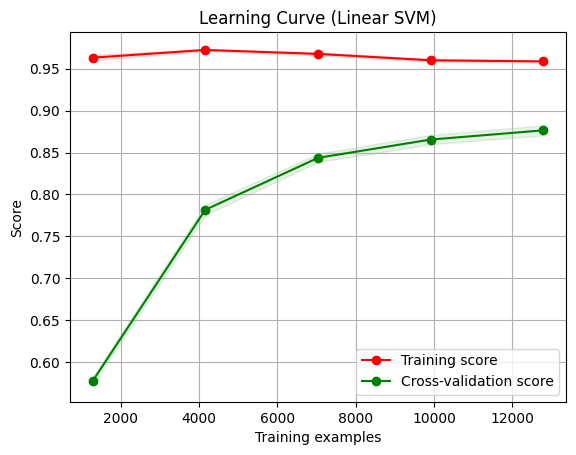

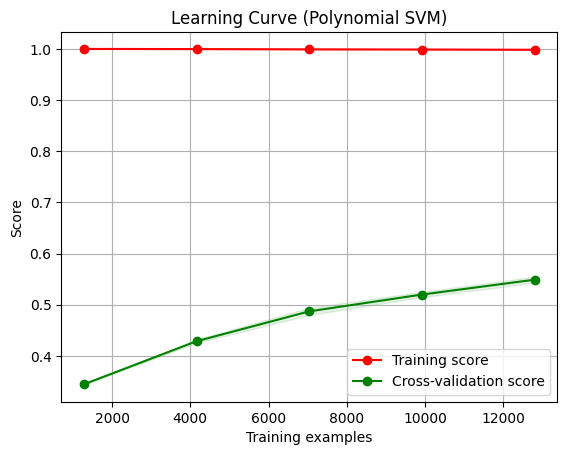

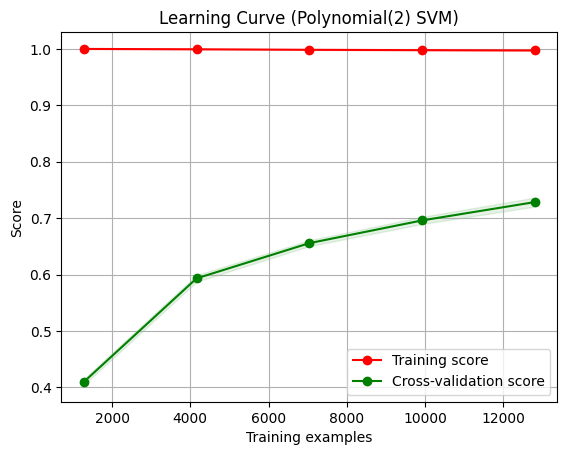

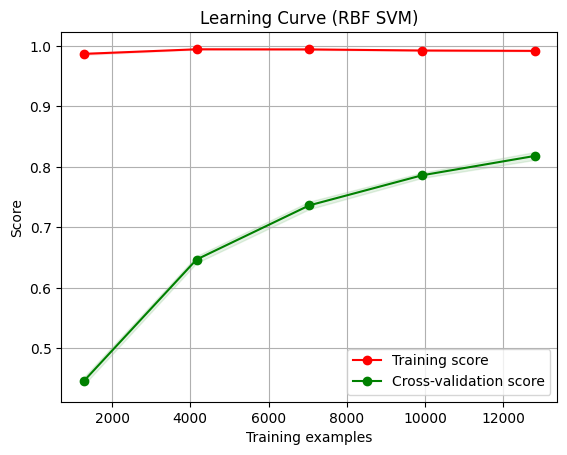

In [8]:
# Learning Comparison

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot Learning Curve for Linear SVM
plot_learning_curve(lsvc, "Learning Curve (Linear SVM)", x_train_tfidf, y_train, cv=5, n_jobs=-1)
plt.savefig('linear_learning_curve.png')

# Plot Learning Curve for Polynomial SVM 3
plot_learning_curve(svclassifier_poly, "Learning Curve (Polynomial SVM)", x_train_tfidf, y_train, cv=5, n_jobs=-1)
plt.savefig('poly_learning_curve.png')

# Plot Learning Curve for Polynomial SVM 2
plot_learning_curve(svclassifier_poly_2, "Learning Curve (Polynomial(2) SVM)", x_train_tfidf, y_train, cv=5, n_jobs=-1)
plt.savefig('poly_learning_curve_2.png')

# Plot Learning Curve for RBF SVM
plot_learning_curve(svclassifier_rbf, "Learning Curve (RBF SVM)", x_train_tfidf, y_train, cv=5, n_jobs=-1)
plt.savefig('rbf_learning_curve.png')


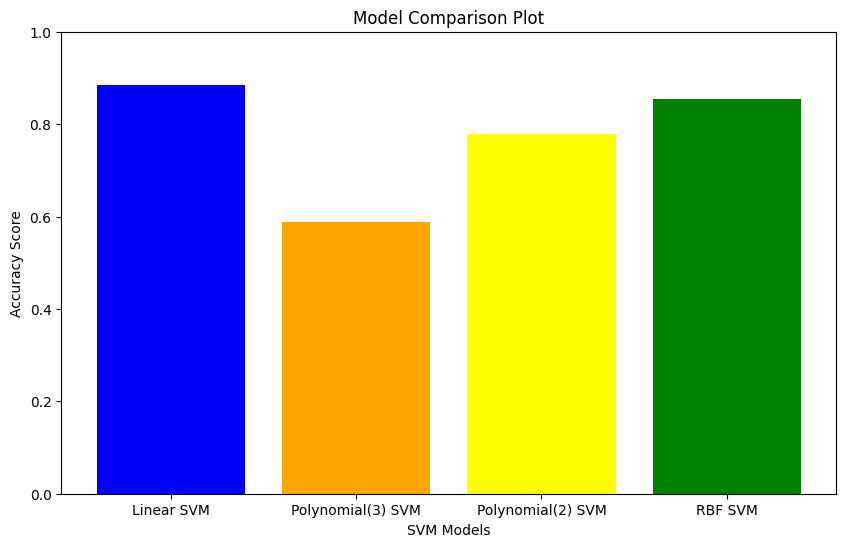

In [9]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = [lsvc.score(x_test_tfidf, test_data['label']),
                   svclassifier_poly.score(x_test_tfidf, test_data['label']),
                   svclassifier_poly_2.score(x_test_tfidf, test_data['label']),
                   svclassifier_rbf.score(x_test_tfidf, test_data['label'])]

# Model names
models = ['Linear SVM', 'Polynomial(3) SVM', 'Polynomial(2) SVM', 'RBF SVM']

# Plotting the Model Comparison Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'yellow', 'green'])
plt.title('Model Comparison Plot')
plt.xlabel('SVM Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()